## Stereo Vision

In [2]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from math import sqrt

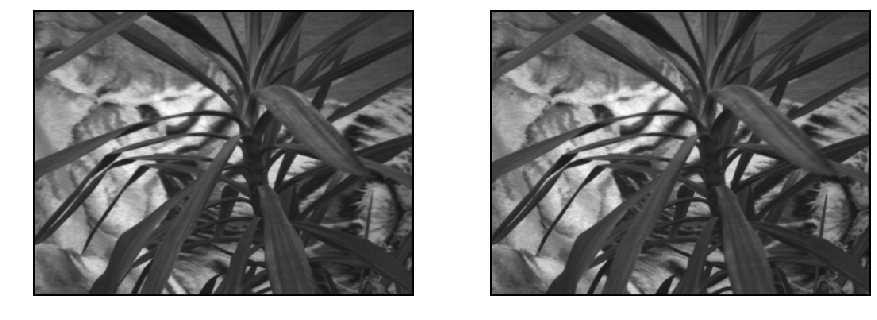

In [200]:
# Read sample images
left = cv2.imread('images/l4.png', 0)
right = cv2.imread('images/r4.png', 0)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(left, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(right, cmap='gray')

ax1.axis('off')
ax2.axis('off')

plt.show()

### SAD (Sum of Absolute Differences)

In [201]:
@jit
def sad(left, right, kernel, offset):
    result = np.zeros( right.shape, dtype=np.int )
    
    h,w = right.shape
    
    range_depth = 255 / offset;
    max_v = kernel * kernel * 255
    min_v = 0
    
    for x in range(h):
        for y in range(w - kernel):
            
            offset_id = 0
            min_sad = kernel * kernel * 255
            
            for o in range(offset):
                if y + kernel + o >= w:
                    break
                
                curr_sad = 0
                for yr in range(kernel):
                    curr_sad += abs(right[x,y + yr] - left[x,y + yr + o])
                
                if curr_sad < min_sad:
                    min_sad = curr_sad
                    offset_id = o
            
            result[x,y] = offset_id * range_depth
            #result[x,y] = (min_sad / max_v) * 255
    return result                

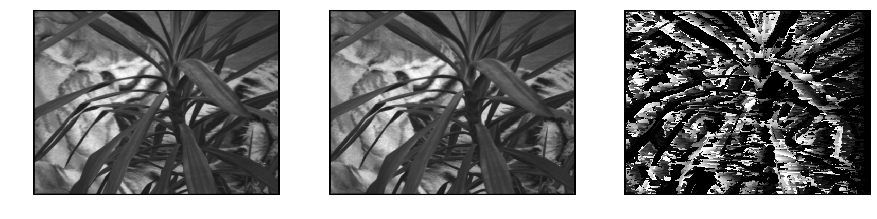

In [213]:
result = sad(left, right, 10, 50)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(131)
ax1.imshow(left, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(right, cmap='gray')
ax3 = plt.subplot(133)
ax3.imshow(result, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()

### SSD (Sum of Squared Differences)

In [214]:
@jit
def ssd(left, right, kernel, offset):
    result = np.zeros( right.shape, dtype=np.int )
    
    h,w = right.shape
    
    range_depth = 255 / offset;
    max_v = kernel * kernel * 255
    min_v = 0
    
    for x in range(h):
        for y in range(w - kernel):
            
            offset_id = 0
            min_sad = kernel * kernel * 255
            
            for o in range(offset):
                if y + kernel + o >= w:
                    break
                
                curr_sad = 0
                for yr in range(kernel):
                    curr_sad += (right[x,y + yr] - left[x,y + yr + o]) ** 2
                
                if curr_sad < min_sad:
                    min_sad = curr_sad
                    offset_id = o
            
            result[x,y] = offset_id * range_depth
            #result[x,y] = (min_sad / max_v) * 255
    return result               

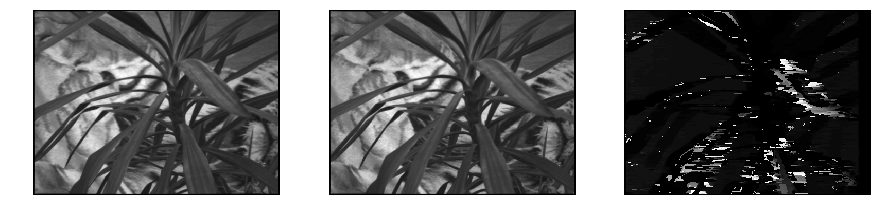

In [224]:
result = ssd(left, right, 20, 70)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(131)
ax1.imshow(left, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(right, cmap='gray')
ax3 = plt.subplot(133)
ax3.imshow(result, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()

### NCC (Normalized Cross Correlation)

In [225]:
@jit
def ncc(left, right, kernel, offset):
    result = np.zeros( right.shape, dtype=np.int )
    
    h,w = right.shape
    
    range_depth = 255 / offset;
    max_v = kernel * kernel * 255
    min_v = 0
    
    for x in range(h):
        for y in range(w - kernel):
            
            min_sad = kernel * kernel * 255
            
            mean_right = np.mean(right[ x, y : y + kernel ])
            sum_right = right[ x, y : y + kernel ] - mean_right
            sum_right_squared = np.sum((right[ x, y : y + kernel ] - mean_right) ** 2)
            
            #print(mean_left, sum_left, sum_left_squared)
            offset_id = 0
            for o in range(offset):
                if y + kernel + o >= w:
                    break
                
                curr_sad = 0
                curr_sum = 0
                mean_left = np.mean(left[ x, y + o: y + kernel + o])
                sum_left = left[ x, y + o: y + kernel + o] - mean_left
                
                curr_sum = np.sum(np.multiply(sum_left,sum_right))          
                
                sum_left_squared = np.sum((left[ x, y + o: y + kernel + o] - mean_left) ** 2)
                
                root = sqrt( sum_left_squared * sum_right_squared )
                if root == 0:
                    curr_sad = 255
                else:
                    curr_sad = curr_sum / root
                
                if curr_sad < min_sad:
                    min_sad = curr_sad
                    offset_id = o
            
            result[x,y] = (offset_id) * range_depth
            #result[x,y] = (min_sad / max_v) * 255
    return result                

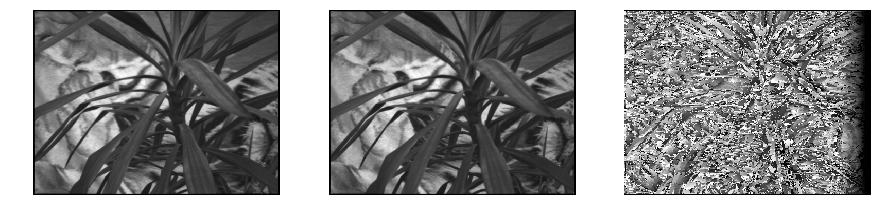

In [234]:
result = ncc(left, right, 10, 50)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(131)
ax1.imshow(left, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(right, cmap='gray')
ax3 = plt.subplot(133)
ax3.imshow(result, cmap='gray')

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()